# Project Setting

In [1]:
%config Completer.use_jedi = False

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [3]:
import src.modules.data_cleaning as dc
import src.modules.data_preprocessing_m as dp_m
from importlib import reload



In [4]:
global LSTM1_OUT_PATH, COLORS, DATA_ORIGINAL_PATH, PREDICT_START_DATE
COLORS = ['#636EFA', '#00CC96', '#EF553B', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
LSTM1_OUT_PATH = 'output/LSTM_1/'

DATA_ORIGINAL_PATH = 'data/'

PREDICT_START_DATE = '2021-07-08'

In [5]:
look_back = 365
prediction_days = 183 # 60
_epochs = 100
_batch_size = 1 # 64 #1 # 2

trend_type = 4 # 4 for FFT + Log space

# Load Data

In [6]:
import pandas as pd
import os

# read the csv file back in
reload(dp_m)
# df_FE_CZ_daily_fill = pd.read_csv(os.path.join(f'output/df_FE_1a_daily_fill.csv'), index_col=0, parse_dates=True)
df_FE_CZ_daily_fill = pd.read_csv(os.path.join(f'output/EDA_result_cz_ffilled.csv'), index_col=0, parse_dates=True)
# df_FE_1a_daily_fill = pd.read_csv(os.path.join(f'output/df_FE_1a_daily_fill.csv'), index_col=0, parse_dates=True)

df_MP = dp_m.read_moonphase_data(DATA_ORIGINAL_PATH + 'Prague 2019-06-01 to 2022-01-14.csv')

# dc.print_df_with_dtypes(df_FE_1a_daily_fill, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='_df_FE_1a_daily_fill')

# dc.print_df_with_dtypes(df_MP, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='_df_MP')



<module 'src.modules.data_preprocessing_m' from '/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing_m.py'>

In [7]:
df_FE_CZ_daily_fill

group1_Pants  group1_Socks  group2_Shorts  group2_With hood
date                                                                   
2019-06-01             8             3              5                 1
2019-06-02             1             0              1                 0
2019-06-03             5             1              4                 0
2019-06-04           109            34             75                 6
2019-06-05           154            87            109                41
...                  ...           ...            ...               ...
2022-01-10            89            99             27                22
2022-01-11            74           119             30                17
2022-01-12            85            83             35                20
2022-01-13            69            79             40                12
2022-01-14            20            38              9                 1

[959 rows x 4 columns]

# Feature Engineering

<module 'src.modules.data_preprocessing_m' from '/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing_m.py'>

============= ====== ===  TL_type:  4
group1_Pants: Polynomial (n=1) parameters: [7.58697302e+02 5.00585957e-02 8.46646635e+01]
group1_Pants: Polynomial (n=2) parameters: [-1.57153516e+03  8.44642959e-06  1.70324986e-02 -1.15773622e-01]
group1_Pants: Exponential parameters: [-1.85389933e+04  1.92979259e+01 -2.36021484e-03  6.58828125e+01]


/Users/ds/miniconda3/envs/tensorflow/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


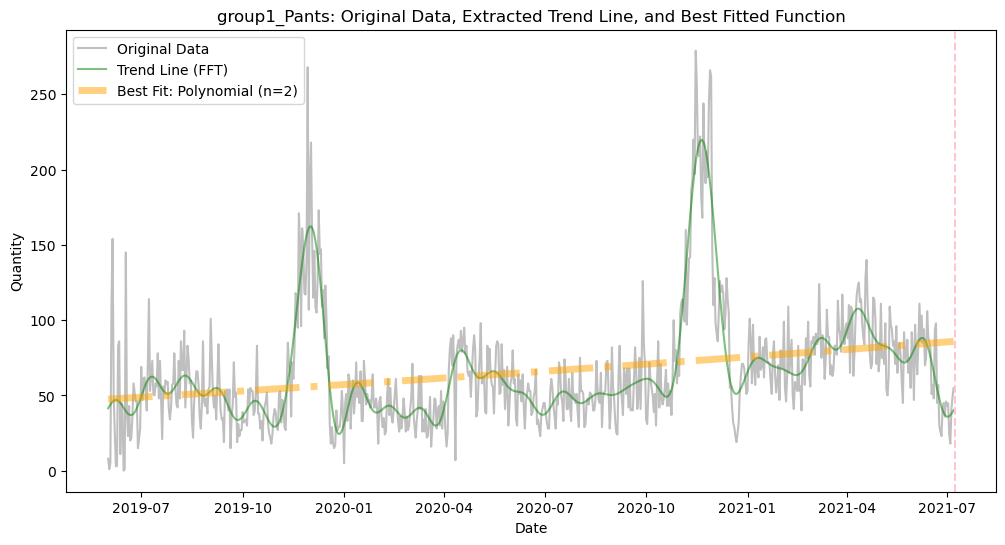

group1_Pants: Best function: Polynomial (n=2)
group1_Pants: MAE: 19.657544906479846, MRE: 0.3029639752984991
group1_Socks: Polynomial (n=1) parameters: [7.68705768e+02 4.59507693e-02 6.82616999e+01]
group1_Socks: Polynomial (n=2) parameters: [6.16062933e+02 4.32789972e-05 6.60809494e-02 6.14605065e+01]
group1_Socks: Exponential parameters: [7.19081787e+04 8.85724832e+01 1.11079833e-02 5.05611979e+01]


/Users/ds/miniconda3/envs/tensorflow/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


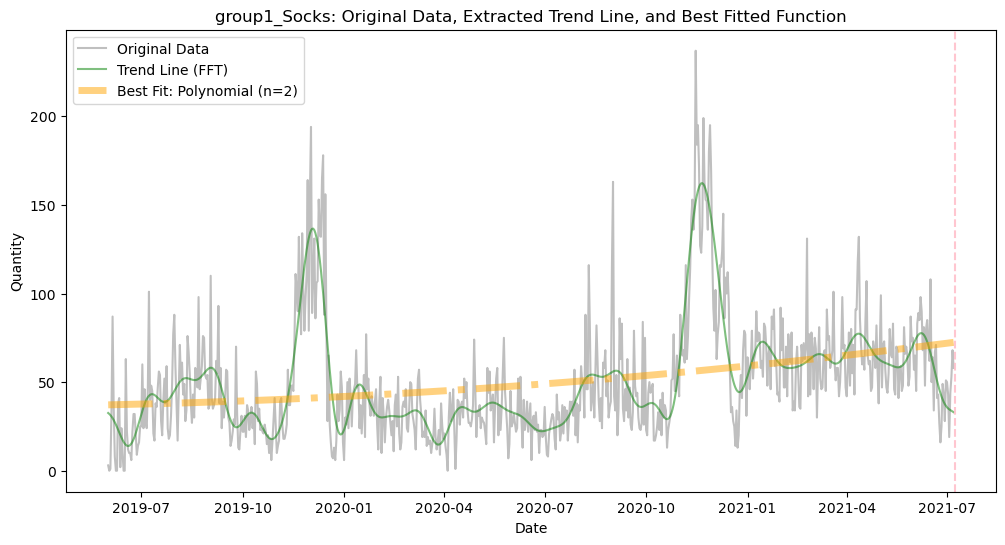

group1_Socks: Best function: Polynomial (n=2)
group1_Socks: MAE: 16.807042871946972, MRE: 0.38805482361295685
group2_Shorts: Polynomial (n=1) parameters: [-8.17774014e+02  2.34957663e-02  7.74259367e+00]
group2_Shorts: Polynomial (n=2) parameters: [ 1.82703171e+02  8.86503150e-05 -1.21056379e-02  3.04665322e+01]
group2_Shorts: Exponential parameters: [-3.20168488e+02  2.18546373e-02  6.50634580e-03  3.08235486e+01]


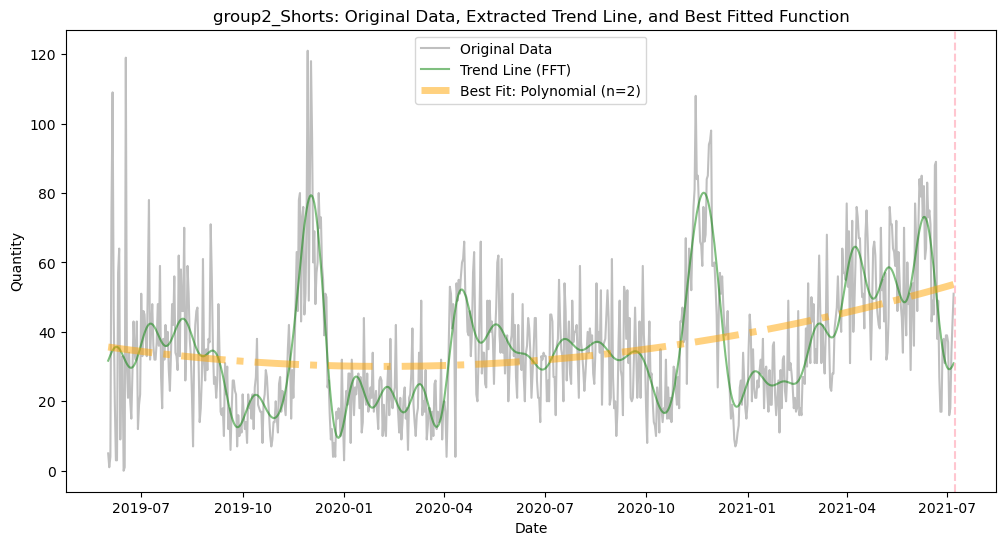

group2_Shorts: Best function: Polynomial (n=2)
group2_Shorts: MAE: 10.46800844105385, MRE: 0.3527485188344707
Unable to fit the exponential function.
group2_With hood: Polynomial (n=1) parameters: [-1.04765166e+03  5.70187789e-03  1.03501640e+01]
group2_With hood: Polynomial (n=2) parameters: [-2.70254680e+02 -9.01271389e-05  1.23543956e-01 -1.93071315e+01]


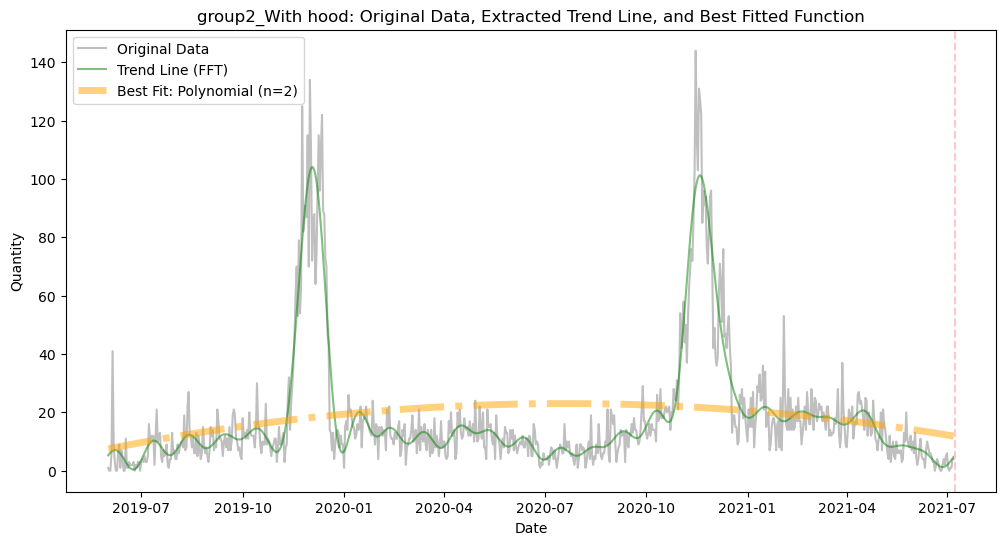

group2_With hood: Best function: Polynomial (n=2)
group2_With hood: MAE: 11.6876059655403, MRE: 1.0173793189664364
TL:  True
$$$$$$$$$$     col:  0
$$$$$$$$$$     col:  1
$$$$$$$$$$     col:  2
$$$$$$$$$$     col:  3
@@@@@@@@@@    df_FE_diff    @@@@@@@@@@
df_FE_diff             group1_Pants  group1_Socks  group2_Shorts  group2_With hood
2019-06-01    -30.915922    -16.929292     -20.722899         -8.505417
2019-06-02    -37.405575    -19.492050     -24.260946         -9.595680
2019-06-03    -32.940914    -18.047268     -20.855440         -9.709005
2019-06-04     71.476524     15.392670      50.488580         -3.839609
2019-06-05    116.847792     68.816965      84.768856         31.019799
...                  ...           ...            ...               ...
2022-01-10           NaN           NaN            NaN               NaN
2022-01-11           NaN           NaN            NaN               NaN
2022-01-12           NaN           NaN            NaN               NaN
2022-01-13   

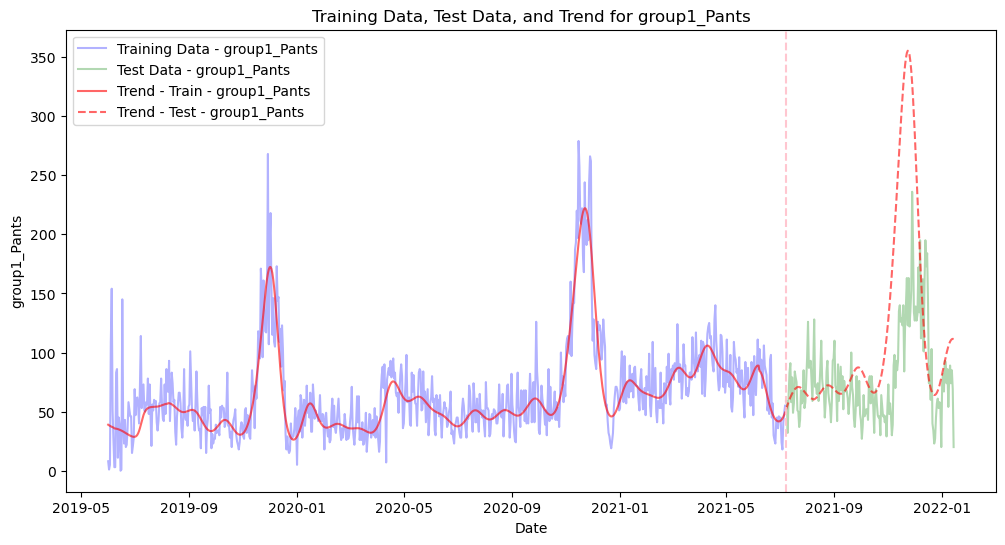

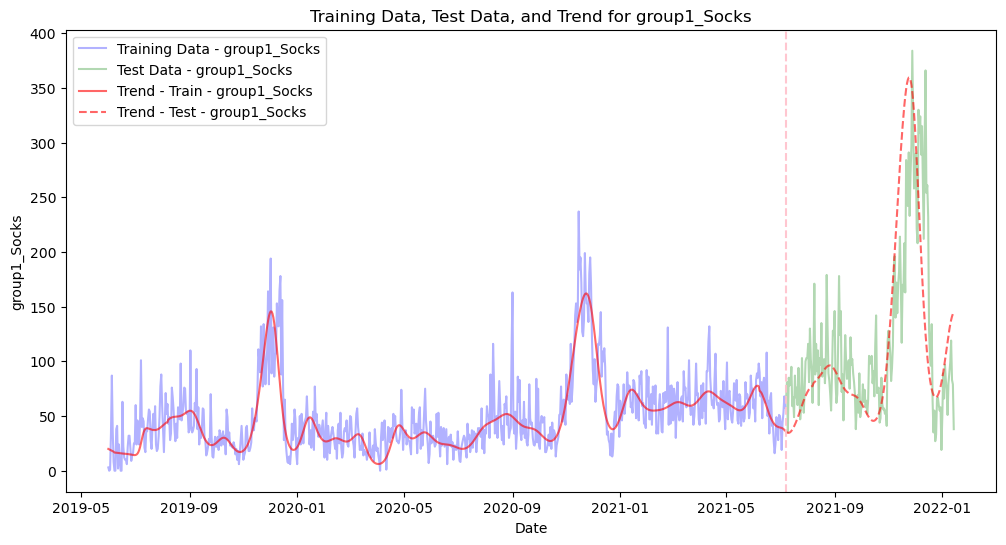

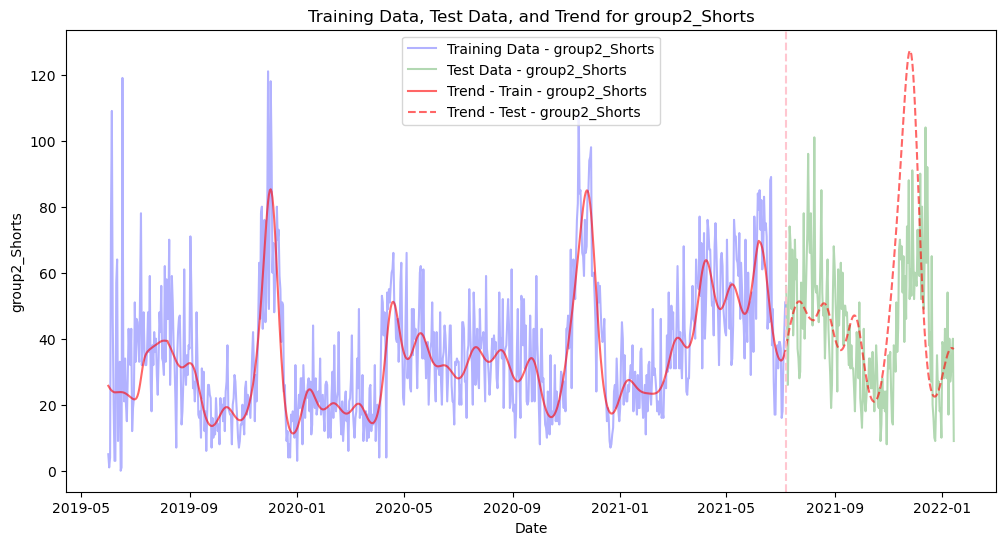

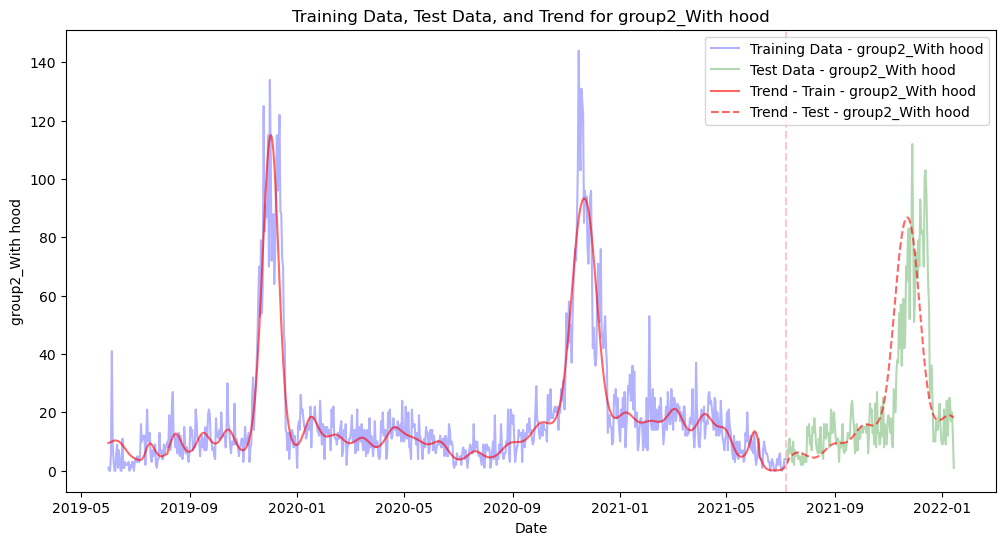

df_fft.shape:  (768, 4)
@@@@@@@@

df_fft: 
             group1_Pants  group1_Socks  group2_Shorts  group2_With hood
date                                                                   
2019-06-01             8             3              5                 1
2019-06-02             1             0              1                 0
2019-06-03             5             1              4                 0
2019-06-04           109            34             75                 6
2019-06-05           154            87            109                41
...                  ...           ...            ...               ...
2021-07-03            24            19             16                 0
2021-07-04            18            44             18                 1
2021-07-05            41            53             34                 1
2021-07-06            49            68             43                 4
2021-07-07            55            58             51                 4

[768 rows x 4 colum

/Users/ds/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ds/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing_m.py:1206: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / sample_frequency[:len(sample_frequency) // 2], fft_magnitude[:len(fft_magnitude) // 2])
/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing_m.py:1221: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(1 / sample_frequency[len(sample_frequency) // 2], 1 / sample_frequency[1])  # Set the x-axis limits to exclude 0 frequency


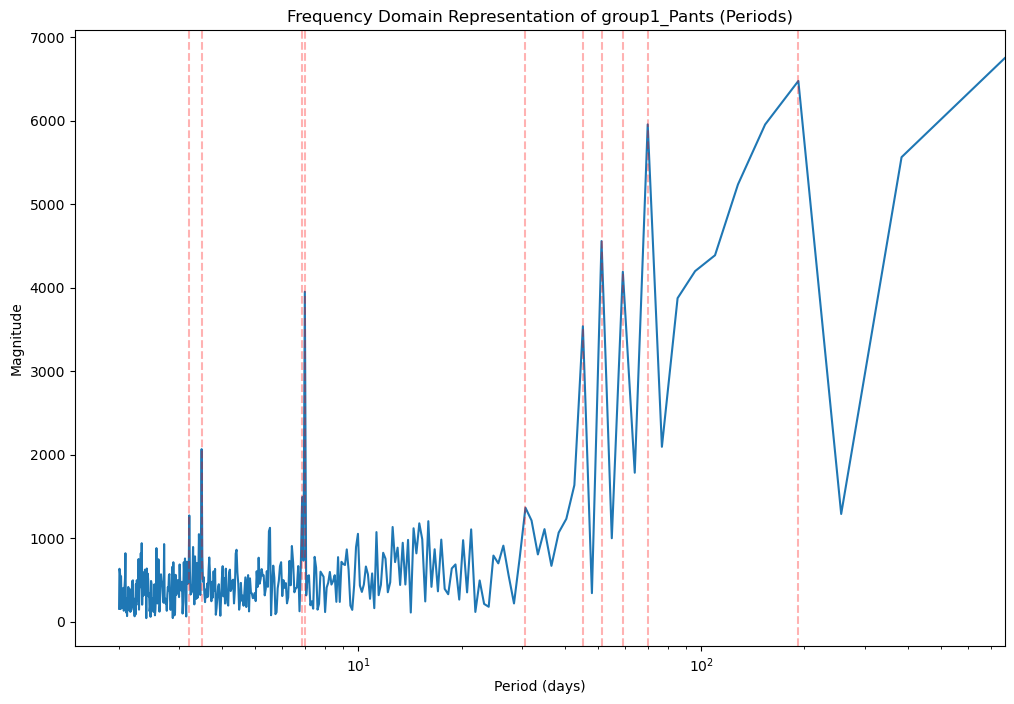

#### df_fft.shape:  (768, 4)
group1_Socks - Cycles with most energy concentration: [96.0, 69.81818181818183, 128.0, 51.2, 6.981818181818182, 45.1764705882353, 59.07692307692308, 13.473684210526315, 24.7741935483871, 20.210526315789476]


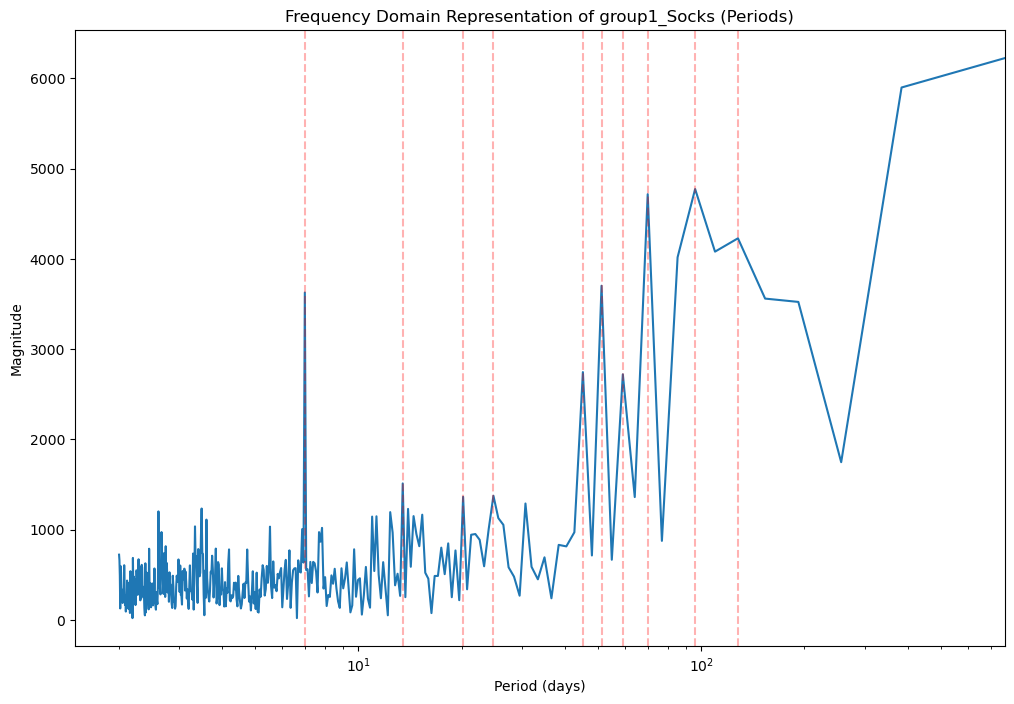

#### df_fft.shape:  (768, 4)
group2_Shorts - Cycles with most energy concentration: [128.0, 69.81818181818183, 192.0, 96.0, 6.981818181818182, 51.2, 45.1764705882353, 59.07692307692308, 32.0, 3.490909090909091]


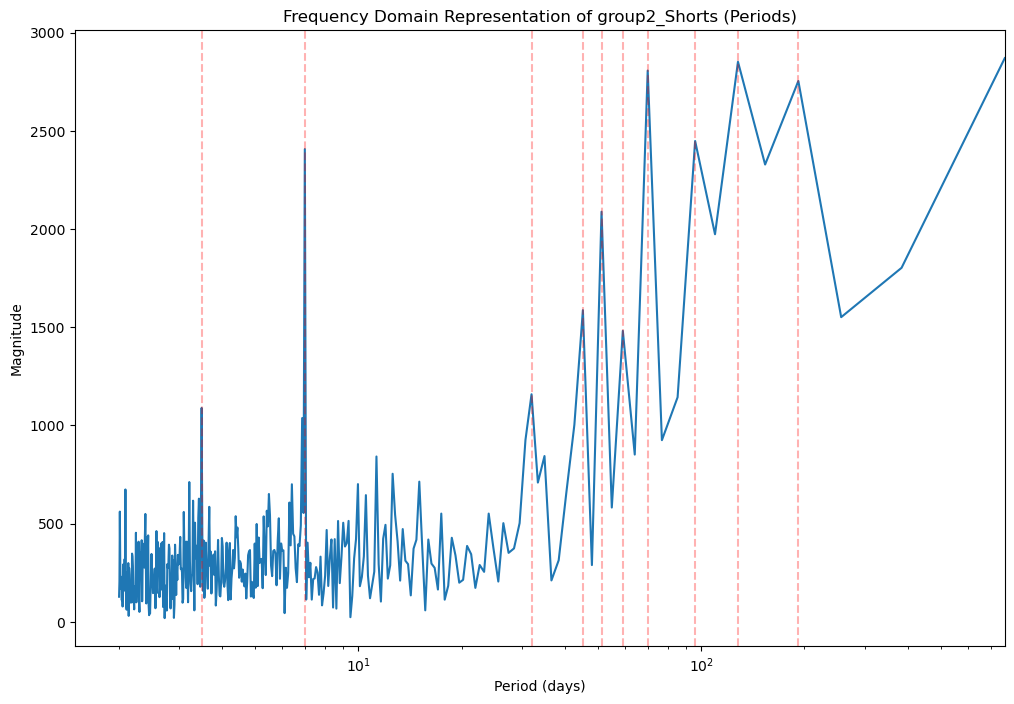

#### df_fft.shape:  (768, 4)
group2_With hood - Cycles with most energy concentration: [384.0, 192.0, 69.81818181818183, 85.33333333333333, 59.07692307692308, 51.2, 45.1764705882353, 38.400000000000006, 6.981818181818182, 21.333333333333332]


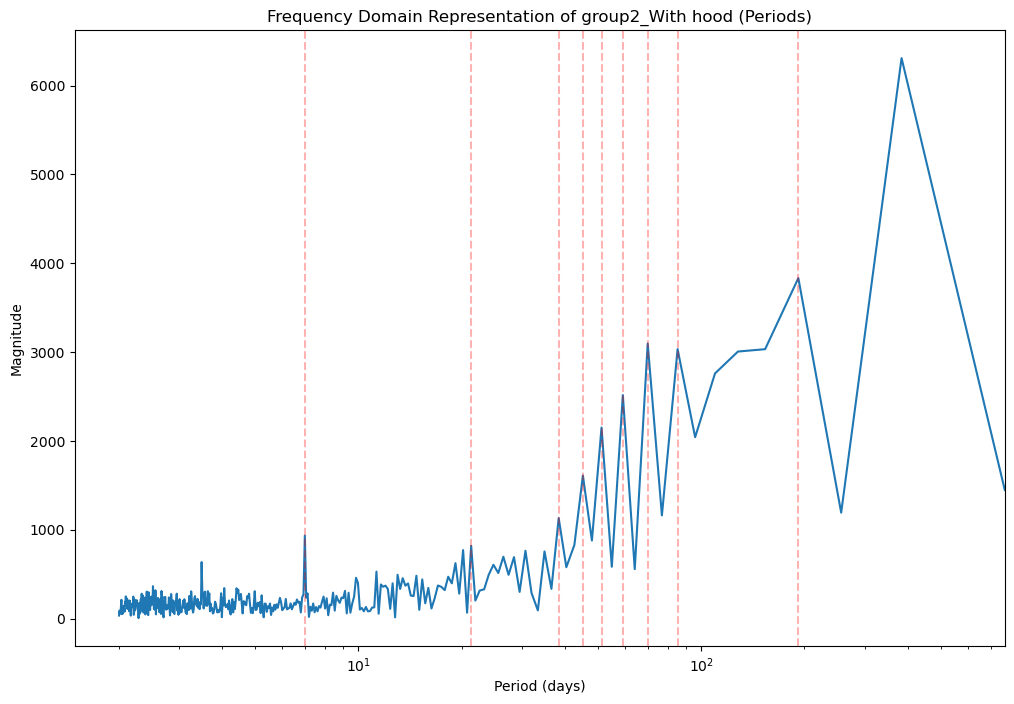

(959, 10)

+---------------------+----------------+----------------+-----------------+--------------------+----------+----------+----------------+----------------+---------------+----------+
|                     |   group1_Pants |   group1_Socks |   group2_Shorts |   group2_With hood |     year |    month |   week_of_year |   day_of_month |   day_of_week | mp       |
|                     |        float64 |        float64 |         float64 |            float64 |   object |   object |         object |         object |        object | object   |
|                     |       NaN: 191 |       NaN: 191 |        NaN: 191 |           NaN: 191 |   NaN: 0 |   NaN: 0 |         NaN: 0 |         NaN: 0 |        NaN: 0 | NaN: 0   |
|---------------------+----------------+----------------+-----------------+--------------------+----------+----------+----------------+----------------+---------------+----------|
| 2019-06-01 00:00:00 |     -30.9159   |     -16.9293   |     -20.7229    |         -8.50542   |    

In [9]:

### Feature Engineering:

reload(dp_m)

import numpy as np

quantity_col_names = df_FE_CZ_daily_fill.columns[:num_dep_features].tolist()

df_FE_diff, df_trend = dp_m.auto_seasonality_TL3m(
    df=df_FE_CZ_daily_fill.copy(), 
    quantity_col_names=quantity_col_names, 
    num_dep_features=num_dep_features, 
    TL=True, 
    TL_type=trend_type, 
    NS=True, 
    AS=False, 
    num_AS=2, 
    MP=True, 
    moonphase_df=df_MP, 
    truncate_date=PREDICT_START_DATE, 
    predict_end_date='2022-01-14', 
    trend_cycle_days=30, 
    N=20, 
    season=365
)

df_FE_diff.shape

dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='df_FE_diff_FE1')



In [10]:
print(df_FE_CZ_daily_fill.columns)

Index(['group1_Pants', 'group1_Socks', 'group2_Shorts', 'group2_With hood'], dtype='object')


In [11]:
# # print the shape before dropping NaN
# print('shape before dropping NaN')
# df_FE_diff.shape
# # drop rows with NaN
# df_FE_diff = df_FE_diff.dropna()
# # print the shape after dropping NaN
# df_FE_diff.shape
# print('shape after dropping NaN')

df_FE_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 959 entries, 2019-06-01 to 2022-01-14
Freq: D
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   group1_Pants      768 non-null    float64
 1   group1_Socks      768 non-null    float64
 2   group2_Shorts     768 non-null    float64
 3   group2_With hood  768 non-null    float64
 4   year              959 non-null    object 
 5   month             959 non-null    object 
 6   week_of_year      959 non-null    object 
 7   day_of_month      959 non-null    object 
 8   day_of_week       959 non-null    object 
 9   mp                959 non-null    object 
dtypes: float64(4), object(6)
memory usage: 114.7+ KB


In [12]:

# dc.print_df_with_dtypes(df_trend, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='df_trend')

# print('df_FE_diff.shape:\n')
# df_FE_diff.shape

# print('df_FE_diff.head:\n')
# df_FE_diff.head()

# print('df_FE_diff.tail:\n')
# df_FE_diff.tail()

print('df_trend.shape:\n')
df_trend.shape

print('df_trend.head:\n')
df_trend.head(10)

print('df_trend.tail:\n')
df_trend.tail(10)

df_trend.shape:



(959, 4)

df_trend.head:



group1_Pants  group1_Socks  group2_Shorts  group2_With hood
2019-06-01     38.915922     19.929292      25.722899          9.505417
2019-06-02     38.405575     19.492050      25.260946          9.595680
2019-06-03     37.940914     19.047268      24.855440          9.709005
2019-06-04     37.523476     18.607330      24.511420          9.839609
2019-06-05     37.152208     18.183035      24.231144          9.980201
2019-06-06     36.823673     17.783315      24.014297         10.122050
2019-06-07     36.532326     17.415101      23.858214         10.255161
2019-06-08     35.807336     16.612507      23.739224         10.398679
2019-06-09     35.741794     16.564160      23.744380         10.379362
2019-06-10     35.615603     16.475878      23.754743         10.336163

df_trend.tail:



group1_Pants  group1_Socks  group2_Shorts  group2_With hood
2022-01-05     96.165726    106.452631      33.367698         18.676658
2022-01-06     99.507722    112.364355      34.375207         18.840133
2022-01-07    102.556774    118.213863      35.252521         18.955930
2022-01-08    105.234453    123.839890      35.977092         19.016171
2022-01-09    107.478150    129.079209      36.533795         19.016229
2022-01-10    109.244749    133.776530      36.915716         18.954923
2022-01-11    110.512814    137.794776      37.124252         18.834470
2022-01-12    111.283057    141.024523      37.168534         18.660180
2022-01-13    111.577082    143.391435      37.064285         18.439949
2022-01-14    111.434630    144.860756      36.832261         18.183592

In [13]:
# # drop the columns: 

# drop columns: day_of_month period_384.00 period_153.60
# df_FE_diff.drop(columns=['year', 'day_of_month', 'period_1'period_384.00', 53.60'], inplace=True)

# df_FE_diff.drop(columns=['year', 'day_of_month'], inplace=True)

# # period_59.08 |   period_96.00 |   period_51.20 |   period_45.18 |
# df_FE_diff.drop(columns=['period_384.00', 'period_96.00', 'period_153.60', 'period_69.82', 'period_59.08', 'period_96.00', 'period_51.20', 'period_45.18'], inplace=True)

# dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='EDA_quantity_sum_df')
dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='df_FE_diff_after_drop')


+---------------------+----------------+----------------+-----------------+--------------------+----------+----------+----------------+----------------+---------------+----------+
|                     |   group1_Pants |   group1_Socks |   group2_Shorts |   group2_With hood |     year |    month |   week_of_year |   day_of_month |   day_of_week | mp       |
|                     |        float64 |        float64 |         float64 |            float64 |   object |   object |         object |         object |        object | object   |
|                     |       NaN: 191 |       NaN: 191 |        NaN: 191 |           NaN: 191 |   NaN: 0 |   NaN: 0 |         NaN: 0 |         NaN: 0 |        NaN: 0 | NaN: 0   |
|---------------------+----------------+----------------+-----------------+--------------------+----------+----------+----------------+----------------+---------------+----------|
| 2019-06-01 00:00:00 |     -30.9159   |     -16.9293   |     -20.7229    |         -8.50542   |    

## One Hot Encode

In [14]:
import pandas as pd 

def one_hot_encode(df,num_dep_features=1):
    # One-hot encode all columns except the first one
    ohe_df = pd.get_dummies(df, columns=df.columns[num_dep_features:])

    # Sort columns by prefix, suffix in ascending order
    # sorted_columns = sorted(ohe_df.columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1]) if len(x.split('_')) > 1 else 0))

    # # Reorder the DataFrame with sorted columns
    # ohe_df = ohe_df[sorted_columns]

    return ohe_df

# One-hot encode the DataFrame
df_FE_diff_OHE = one_hot_encode(df_FE_diff,num_dep_features=num_dep_features)

df_FE_diff_OHE.shape
dc.print_df_with_dtypes(df_FE_diff_OHE, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='_one_hot_encode')

(959, 116)

+---------------------+----------------+----------------+-----------------+--------------------+-------------+-------------+-------------+-------------+-----------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-----

## LSTM

In [15]:
df_trend

group1_Pants  group1_Socks  group2_Shorts  group2_With hood
2019-06-01     38.915922     19.929292      25.722899          9.505417
2019-06-02     38.405575     19.492050      25.260946          9.595680
2019-06-03     37.940914     19.047268      24.855440          9.709005
2019-06-04     37.523476     18.607330      24.511420          9.839609
2019-06-05     37.152208     18.183035      24.231144          9.980201
...                  ...           ...            ...               ...
2022-01-10    109.244749    133.776530      36.915716         18.954923
2022-01-11    110.512814    137.794776      37.124252         18.834470
2022-01-12    111.283057    141.024523      37.168534         18.660180
2022-01-13    111.577082    143.391435      37.064285         18.439949
2022-01-14    111.434630    144.860756      36.832261         18.183592

[959 rows x 4 columns]

<Axes: title={'center': 'df_trend'}>

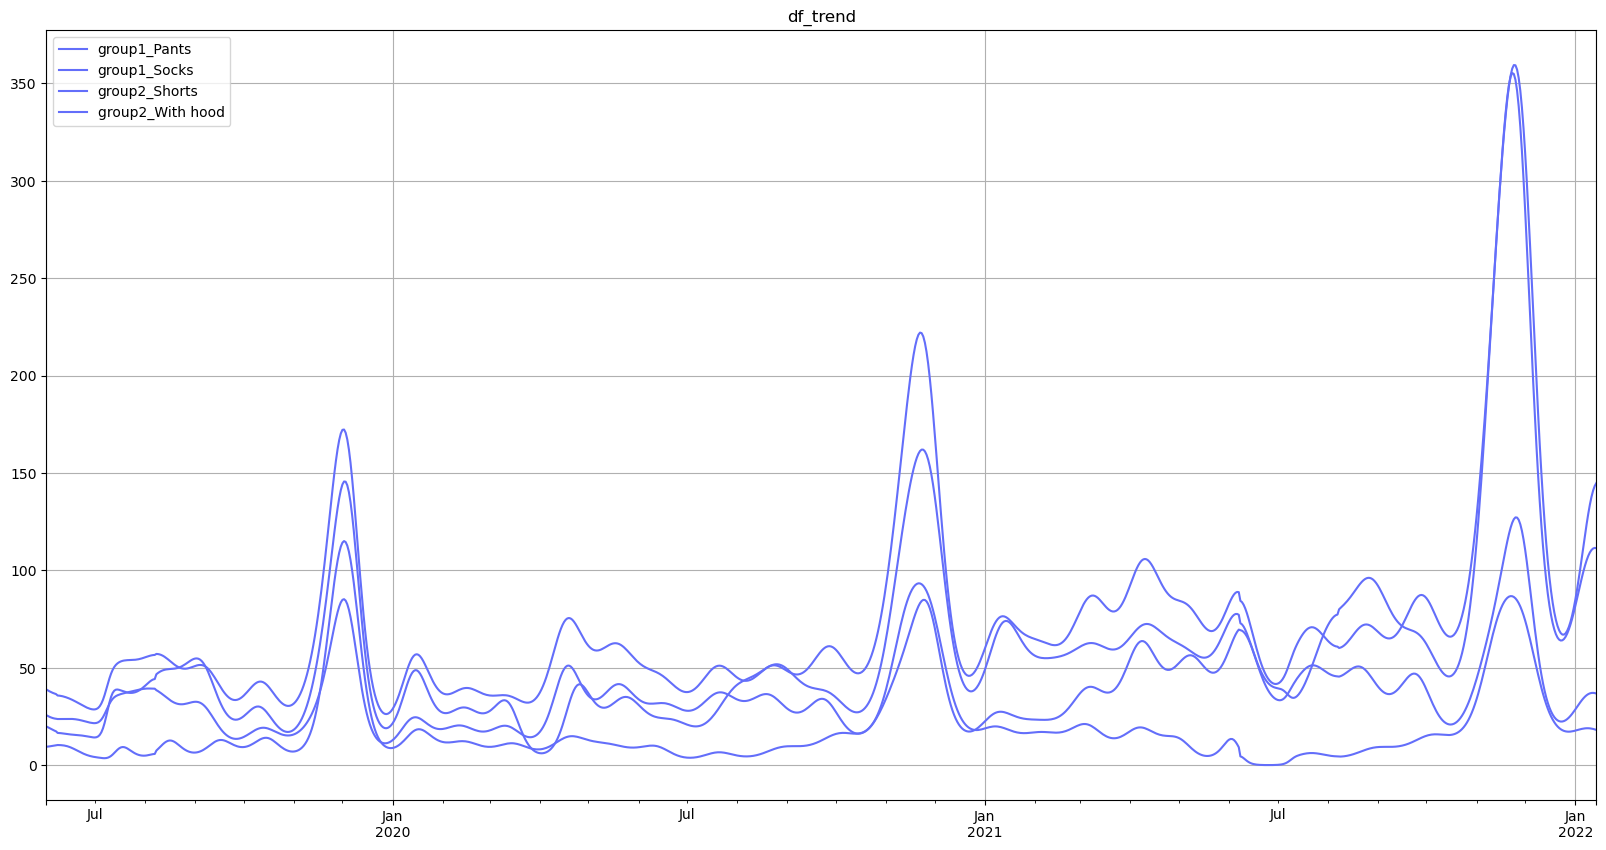

In [16]:
# plot df_trend

df_trend.plot(figsize=(20,10), color=COLORS[0], title='df_trend', grid=True)

In [17]:
df_FE_diff

group1_Pants  group1_Socks  group2_Shorts  group2_With hood  year   
2019-06-01    -30.915922    -16.929292     -20.722899         -8.505417  2019  \
2019-06-02    -37.405575    -19.492050     -24.260946         -9.595680  2019   
2019-06-03    -32.940914    -18.047268     -20.855440         -9.709005  2019   
2019-06-04     71.476524     15.392670      50.488580         -3.839609  2019   
2019-06-05    116.847792     68.816965      84.768856         31.019799  2019   
...                  ...           ...            ...               ...   ...   
2022-01-10           NaN           NaN            NaN               NaN  2022   
2022-01-11           NaN           NaN            NaN               NaN  2022   
2022-01-12           NaN           NaN            NaN               NaN  2022   
2022-01-13           NaN           NaN            NaN               NaN  2022   
2022-01-14           NaN           NaN            NaN               NaN  2022   

           month week_of_year day_of_month day_of_week mp  
2019-06-01     6           22            1           5  n  
2019-06-02     6           22            2           6  n  
2019-06-03     6           23            3           0  0  
2019-06-04     6           23            4           1  n  
2019-06-05     6           23            5           2  n  
...          ...          ...          ...         ... ..  
2022-01-10     1            2           10           0  1  
2022-01-11     1            2           11           1  n  
2022-01-12     1            2           12           2  n  
2022-01-13     1            2           13           3  n  
2022-01-14     1            2           14           4  n  

[959 rows x 10 columns]

## Two X LSTM



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Concatenate
from joblib import dump, load
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Concatenate, Reshape

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def create_dataset(dataset, data_index, test_start_date='2021-07-08', look_back=1, prediction_days=1, num_dep_features=1):
#     test_start_idx = np.where(data_index == test_start_date)[0][0]
#     X1, X2, Y = [], [], []
#     for i in range(test_start_idx - look_back - prediction_days + 1):
#         a = dataset[i:(i + look_back), :]
#         X1.append(a)
#         X2.append(dataset[i + look_back:i + look_back + prediction_days, num_dep_features:])
#         Y.append(dataset[i + look_back:i + look_back + prediction_days, 0:num_dep_features])
#     return np.array(X1), np.array(X2), np.array(Y)

# def create_dataset_X_only(dataset, data_index, test_start_date='2021-07-08', look_back=1, prediction_days=1, num_dep_features=1):
#     test_start_idx = np.where(data_index == test_start_date)[0][0]
#     X1, X2 = [], []
#     X1 = [dataset[test_start_idx-look_back:test_start_idx, :]]
#     X2 = [dataset[test_start_idx:test_start_idx + prediction_days, num_dep_features:]]
#     return np.array(X1), np.array(X2)

def create_dataset(dataset, data_index, test_start_date='2021-07-08', look_back=1, prediction_days=1, num_dep_features=1):
    test_start_idx = np.where(data_index == test_start_date)[0][0]
    X1, X2, Y = [], [], []
    for i in range(test_start_idx - look_back - prediction_days + 1):
        a = dataset[i:(i + look_back), :]
        X1.append(a)
        X2.append(dataset[i + look_back:i + look_back + prediction_days, num_dep_features:])
        Y.append(dataset[i + look_back:i + look_back + prediction_days, 0:num_dep_features])
    return np.array(X1), np.array(X2), np.array(Y)

def create_dataset_X_only(dataset, data_index, test_start_date='2021-07-08', look_back=1, prediction_days=1, num_dep_features=1):
    test_start_idx = np.where(data_index == test_start_date)[0][0]
    X1, X2 = [], []
    X1 = [dataset[test_start_idx-look_back:test_start_idx, :]]
    X2 = [dataset[test_start_idx:test_start_idx + prediction_days, num_dep_features:]]
    return np.array(X1), np.array(X2)


data_orgin = df_FE_diff
n_features = df_FE_diff_OHE.shape[1]  # Number of independent features

# Use the first 'n_features' columns for prediction
data = df_FE_diff_OHE

# Define the test_start_date
test_start_date = PREDICT_START_DATE

unique_suffix = f'{test_start_date}_{look_back}_{prediction_days}_{_epochs}_{_batch_size}'

# Split the data into training and testing sets before applying the MinMaxScaler
# train = data[data.index < test_start_date]
# test = data[data.index >= test_start_date]
train = data
test = df_FE_CZ_daily_fill[df_FE_CZ_daily_fill.index >= test_start_date]


# Scale the training and testing sets separately using one scaler for all features
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)


# Modify the function calls

X_train, X2_train, y_train = create_dataset(train_scaled, train.index, test_start_date=PREDICT_START_DATE, look_back=look_back, prediction_days=prediction_days, num_dep_features=num_dep_features)
X_predict, X2_predict = create_dataset_X_only(train_scaled, train.index, test_start_date=PREDICT_START_DATE, look_back=look_back, prediction_days=prediction_days, num_dep_features=num_dep_features)


# custom constraint for non-negativity
import tensorflow as tf


n_features_X1 = X_train.shape[2]
n_features_X2 = X2_train.shape[2]

input_X1 = Input(shape=(X_train.shape[1], n_features_X1))
input_X2 = Input(shape=(X2_train.shape[1], n_features_X2))

lstm_X1 = LSTM(160, return_sequences=True)(input_X1)
dropout_X1 = Dropout(0.1)(lstm_X1)
lstm_X1_2 = LSTM(96, return_sequences=False)(dropout_X1)
dropout_X1_2 = Dropout(0.1)(lstm_X1_2)

lstm_X2 = LSTM(160, return_sequences=True)(input_X2)
dropout_X2 = Dropout(0.1)(lstm_X2)
lstm_X2_2 = LSTM(96, return_sequences=False)(dropout_X2)
dropout_X2_2 = Dropout(0.1)(lstm_X2_2)

concat = Concatenate()([dropout_X1_2, dropout_X2_2])

# dense1 = Dense(352)(concat)
# # output = Dense(prediction_days)(dense1)
# output = Dense(prediction_days * num_dep_features)(dense1)

dense1 = Dense(352)(concat)
dense2 = Dense(prediction_days * num_dep_features)(dense1)
output = Reshape((prediction_days, num_dep_features))(dense2)
# output = Reshape((num_dep_features, prediction_days))(dense2)
model = Model(inputs=[input_X1, input_X2], outputs=output)
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(optimizer='adam', loss=non_neg_loss) # because we are predicting the difference from the trend line, therefore we cannot to apply non-negativity constraint




history = model.fit([X_train, X2_train], y_train, epochs=_epochs, batch_size=_batch_size, verbose=2)


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 365, 116)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 183, 112)]   0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 365, 160)     177280      ['input_1[0][0]']                
                                                                                                  
 lstm_2 (LSTM)                  (None, 183, 160)     174720      ['input_2[0][0]']                
                  

2023-04-22 19:27:24.836478: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


221/221 - 10s - loss: 0.0173 - 10s/epoch - 47ms/step
Epoch 2/100
221/221 - 8s - loss: 0.0127 - 8s/epoch - 37ms/step
Epoch 3/100
221/221 - 8s - loss: 0.0119 - 8s/epoch - 37ms/step
Epoch 4/100
221/221 - 8s - loss: 0.0107 - 8s/epoch - 37ms/step
Epoch 5/100
221/221 - 8s - loss: 0.0099 - 8s/epoch - 37ms/step
Epoch 6/100
221/221 - 8s - loss: 0.0088 - 8s/epoch - 37ms/step
Epoch 7/100
221/221 - 9s - loss: 0.0087 - 9s/epoch - 40ms/step
Epoch 8/100
221/221 - 9s - loss: 0.0082 - 9s/epoch - 42ms/step
Epoch 9/100
221/221 - 9s - loss: 0.0079 - 9s/epoch - 43ms/step
Epoch 10/100
221/221 - 9s - loss: 0.0079 - 9s/epoch - 42ms/step
Epoch 11/100
221/221 - 9s - loss: 0.0076 - 9s/epoch - 41ms/step
Epoch 12/100
221/221 - 9s - loss: 0.0078 - 9s/epoch - 40ms/step
Epoch 13/100
221/221 - 12s - loss: 0.0075 - 12s/epoch - 53ms/step
Epoch 14/100
221/221 - 9s - loss: 0.0071 - 9s/epoch - 39ms/step
Epoch 15/100
221/221 - 9s - loss: 0.0070 - 9s/epoch - 40ms/step
Epoch 16/100
221/221 - 8s - loss: 0.0074 - 8s/epoch - 38m

1/1 [==============================] - 0s 38ms/step
feature column id i:  0
scaler.min_[i]:  0.3515060634797656
scaler.scale_[i]:  0.005549903209136781
feature column id i:  1
scaler.min_[i]:  0.35378238090218345
scaler.scale_[i]:  0.005683240704517846
feature column id i:  2
scaler.min_[i]:  0.2666541304243399
scaler.scale_[i]:  0.007701281379768607
feature column id i:  3
scaler.min_[i]:  0.42515079535968553
scaler.scale_[i]:  0.009985735291833973


Text(0.5, 1.0, 'Model Loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

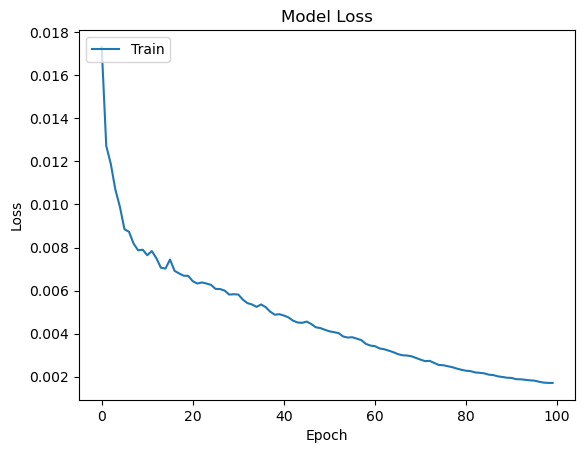

In [19]:

# Generate the predictions using the trained model
train_predict = model.predict([X_train, X2_train])
y_predict = model.predict([X_predict, X2_predict])


for i in range(num_dep_features):
    
    print('feature column id i: ', i)
    print('scaler.min_[i]: ', scaler.min_[i])
    print('scaler.scale_[i]: ', scaler.scale_[i])
    
    # Calculate the inverse transformation for the 'quantity' feature in train_predict
    train_predict[:, :, i] = (train_predict[:, :, i] - scaler.min_[i]) / scaler.scale_[i]

    # Calculate the inverse transformation for the 'quantity' feature in y_predict
    y_predict[:, :, i] = (y_predict[:, :, i] - scaler.min_[i]) / scaler.scale_[i]



# Update the train and test dates
train_dates = train[train.index < test_start_date].index
test_dates = train[train.index >= test_start_date].index

# Get the dates for y_predict, which should be in the test dataset's range
# prediction_dates = pd.date_range(train.index[-1] + pd.Timedelta(days=1), periods=prediction_days, freq='D')
prediction_dates = train[train.index >= test_start_date].index[:prediction_days]

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig(os.path.join(LSTM1_OUT_PATH, f'LSTM1_iteration_{unique_suffix}.png'), dpi=300)
plt.show()

# df_trend 's index range from test_start_date , number of prediction_days, 's value:

# df_trend.index >=test_start_date and len = prediction_days subset is:
test_trend = df_trend[(df_trend.index >= pd.Timestamp(test_start_date)) & (df_trend.index < pd.Timestamp(test_start_date) + pd.Timedelta(days=prediction_days))]

train_trend = df_trend[(df_trend.index < pd.Timestamp(test_start_date)) ]



In [20]:


# Convert test_trend.iloc[:,0] to a 2D numpy array with shape (1, 183)
test_trend_array = test_trend.iloc[:,:num_dep_features].to_numpy().reshape(1, -1)
train_trend_array = train_trend.iloc[:,:num_dep_features].to_numpy().reshape(1, -1)


In [21]:
# Add the two arrays together
for i in range(num_dep_features):
    y_predict[:, :, i] = y_predict[:, :, i] + test_trend.iloc[:, i].values.reshape(1, -1)

# Calculate evaluation metrics
for i in range(num_dep_features):
    feature_name = data.columns[i]
    rmse = math.sqrt(mean_squared_error(test[:prediction_days][feature_name], y_predict[:, :, i].flatten()))
    mae = mean_absolute_error(test[:prediction_days][feature_name], y_predict[:, :, i].flatten())
    mape = mean_absolute_percentage_error(test[:prediction_days][feature_name], y_predict[:, :, i].flatten())
    r2 = r2_score(test[:prediction_days][feature_name], y_predict[:, :, i].flatten())

    # Save evaluation metrics to a txt file
    with open(os.path.join(LSTM1_OUT_PATH, f'LSTM1_report_{unique_suffix}_column_{i}_{feature_name}.txt'), 'w') as f:
        f.write(f'RMSE: {rmse}\n')
        f.write(f'MAE: {mae}\n')
        f.write(f'MAPE: {mape}\n')
        f.write(f'R2: {r2}\n')


# Save the model to an h5 file
model.save(os.path.join(LSTM1_OUT_PATH, f'LSTM1_model_{unique_suffix}.h5'))


# Save the prediction to a csv file
prediction_df = pd.DataFrame(y_predict.reshape(-1,num_dep_features), columns=data_orgin.columns[:num_dep_features], index=prediction_dates)
prediction_df.to_csv(os.path.join(LSTM1_OUT_PATH, f'LSTM1_prediction_{unique_suffix}.csv'))



24

23

24

23

25

23

24

22

25

23

24

23

25

24

25

23

In [22]:




# Calculate evaluation metrics
for i in range(num_dep_features):
    feature_name = data.columns[i]
    rmse = math.sqrt(mean_squared_error(test[:prediction_days][feature_name], y_predict[:, :, i].flatten()))
    mae = mean_absolute_error(test[:prediction_days][feature_name], y_predict[:, :, i].flatten())
    mape = mean_absolute_percentage_error(test[:prediction_days][feature_name], y_predict[:, :, i].flatten())
    r2 = r2_score(test[:prediction_days][feature_name], y_predict[:, :, i].flatten())

    # Save evaluation metrics to a txt file
    with open(os.path.join(LSTM1_OUT_PATH, f'LSTM1_report_{unique_suffix}_column_{i}_{feature_name}.txt'), 'w') as f:
        f.write(f'RMSE: {rmse}\n')
        f.write(f'MAE: {mae}\n')
        f.write(f'MAPE: {mape}\n')
        f.write(f'R2: {r2}\n')


# Save the model to an h5 file
model.save(os.path.join(LSTM1_OUT_PATH, f'LSTM1_model_{unique_suffix}.h5'))


# Save the prediction to a csv file
prediction_df = pd.DataFrame(y_predict.reshape(-1,num_dep_features), columns=data_orgin.columns[:num_dep_features], index=prediction_dates)
prediction_df.to_csv(os.path.join(LSTM1_OUT_PATH, f'LSTM1_prediction_{unique_suffix}.csv'))



24

23

24

23

25

23

24

22

25

23

24

23

25

24

25

23

individual scaler for each feature



------

# Result Visualization

Plotting predictions for group1_Pants...


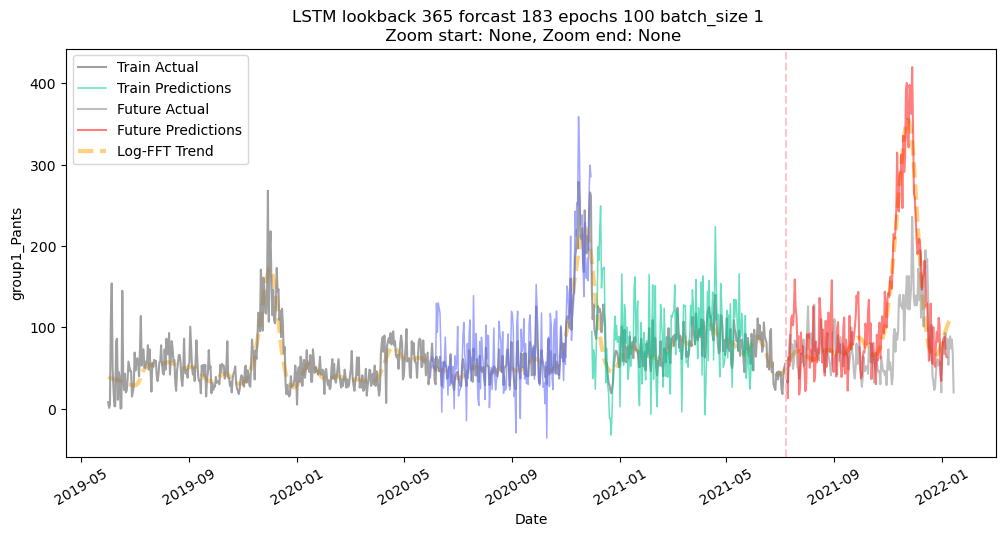

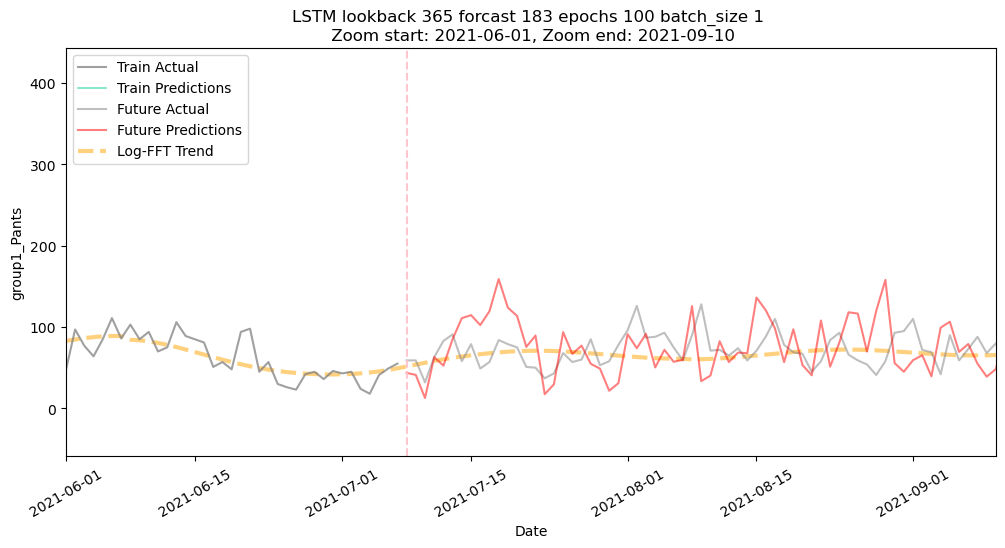

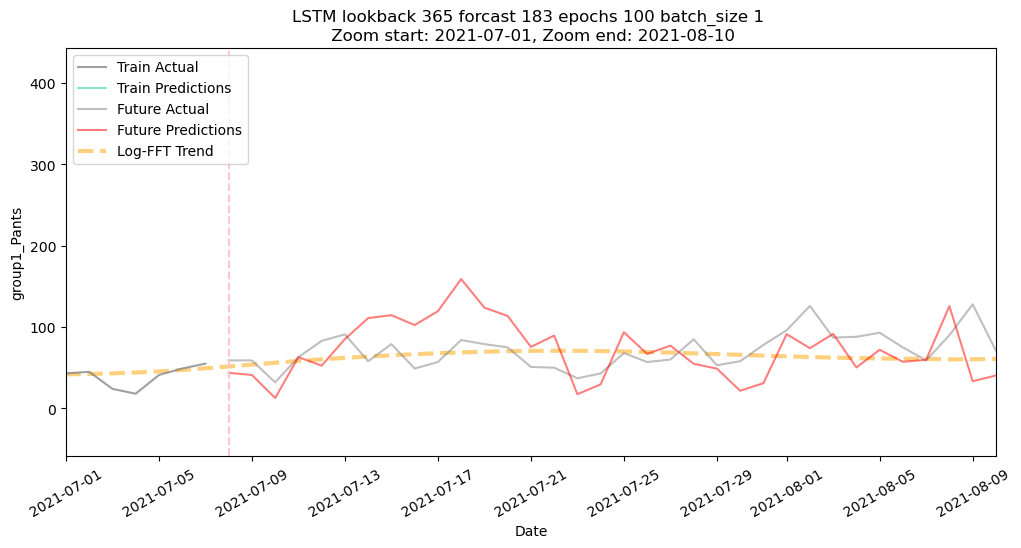

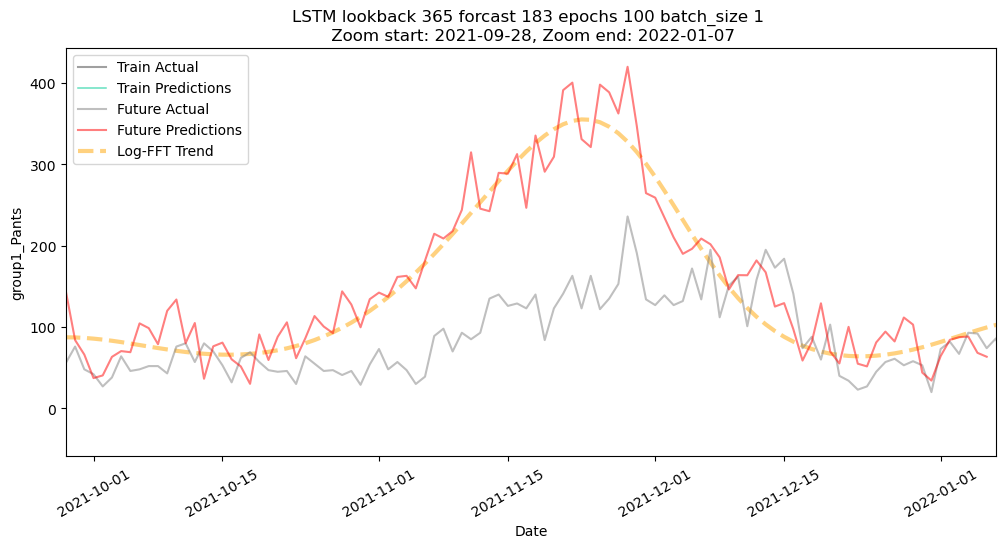

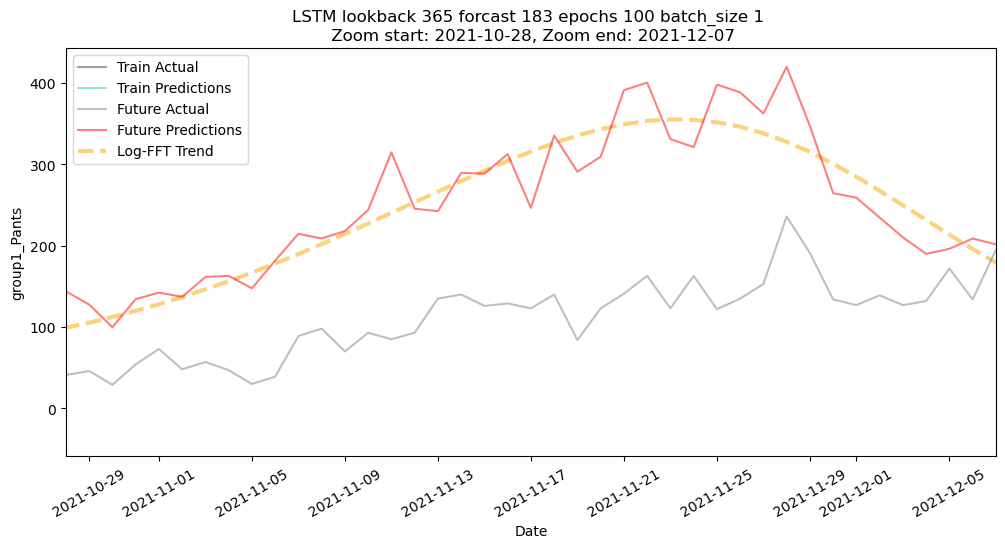

Plotting predictions for group1_Socks...


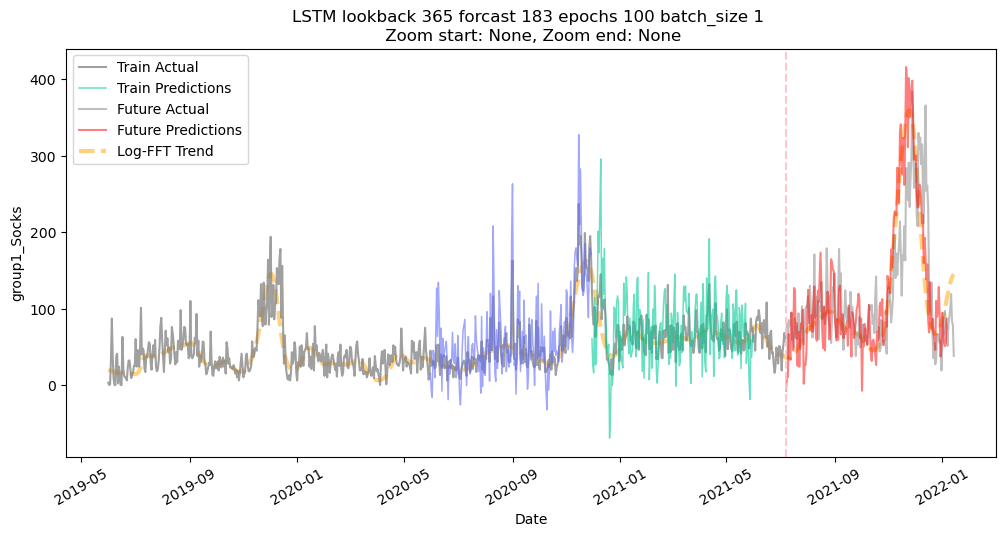

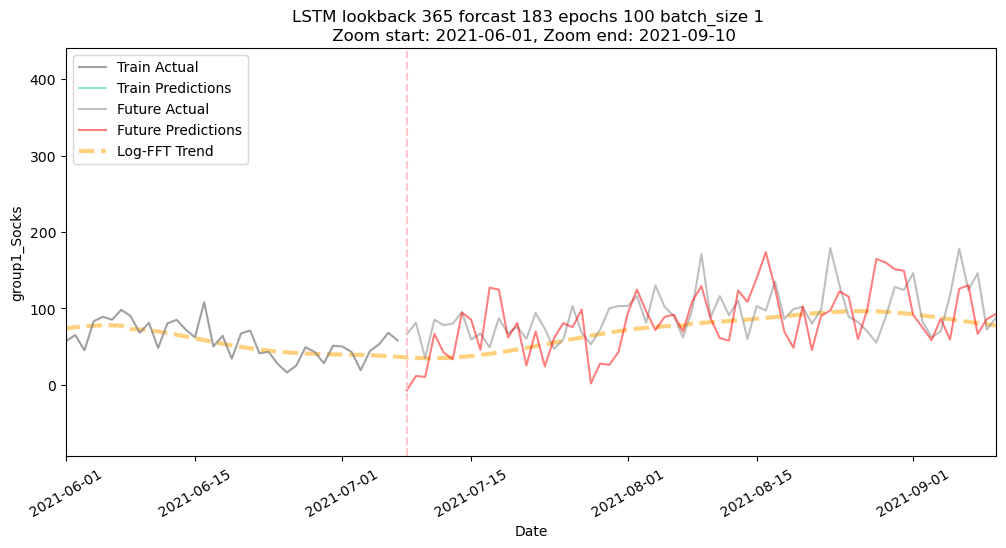

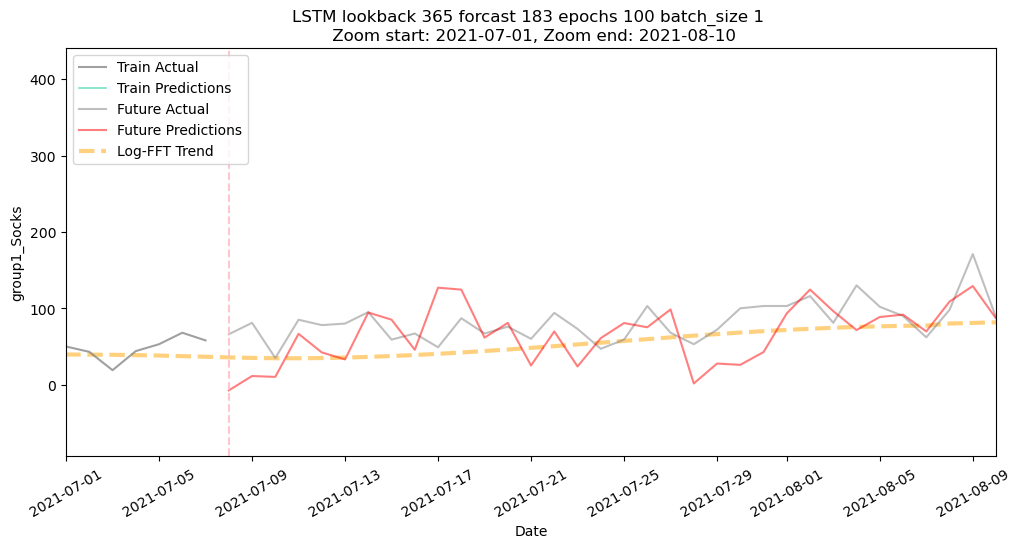

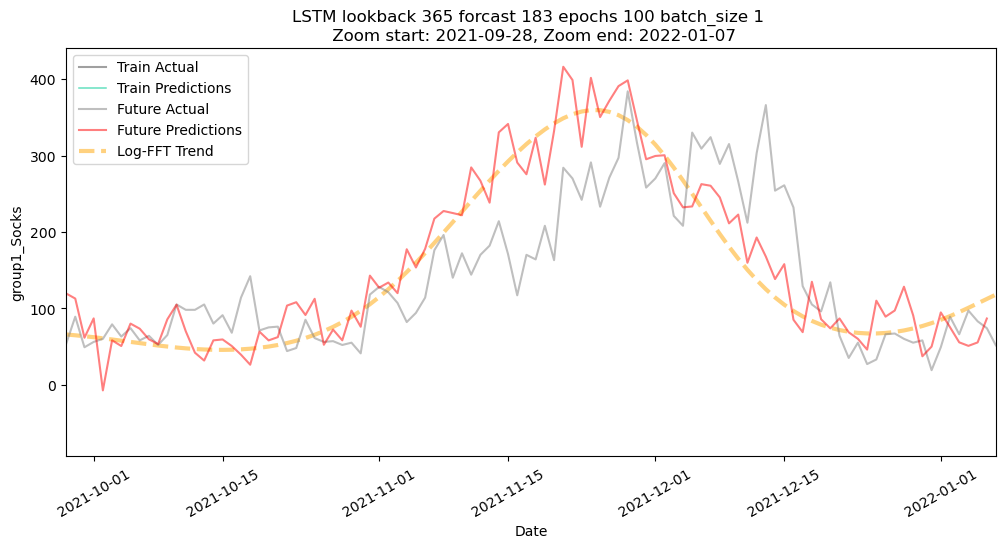

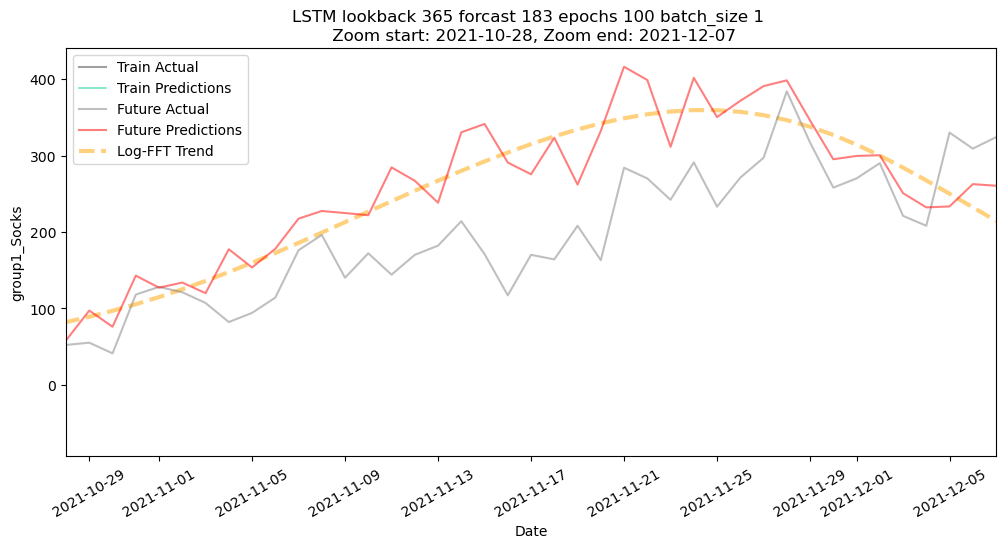

Plotting predictions for group2_Shorts...


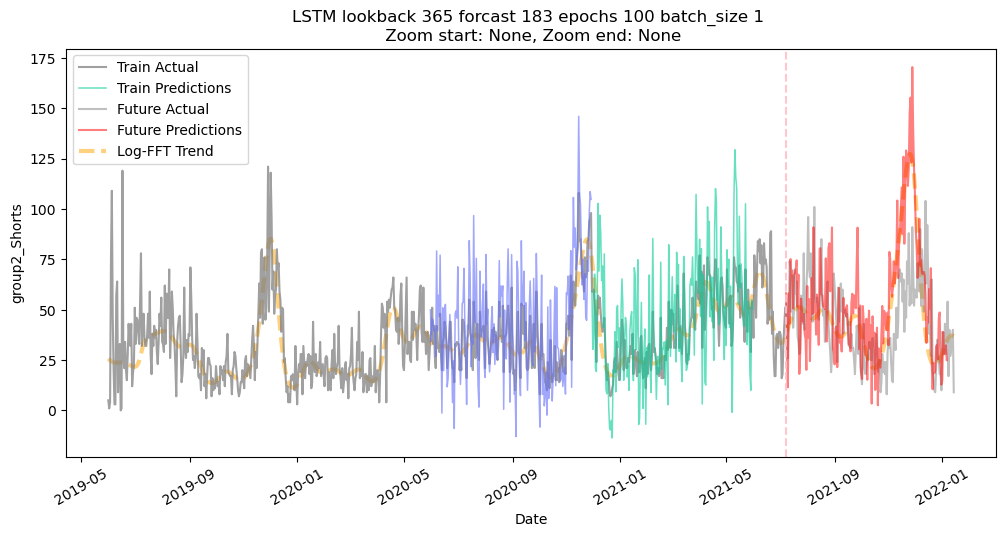

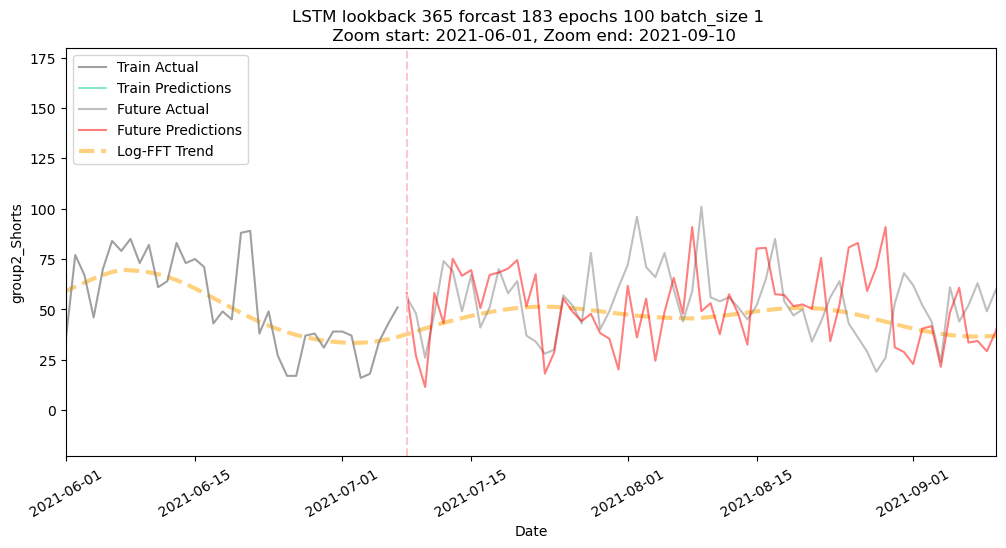

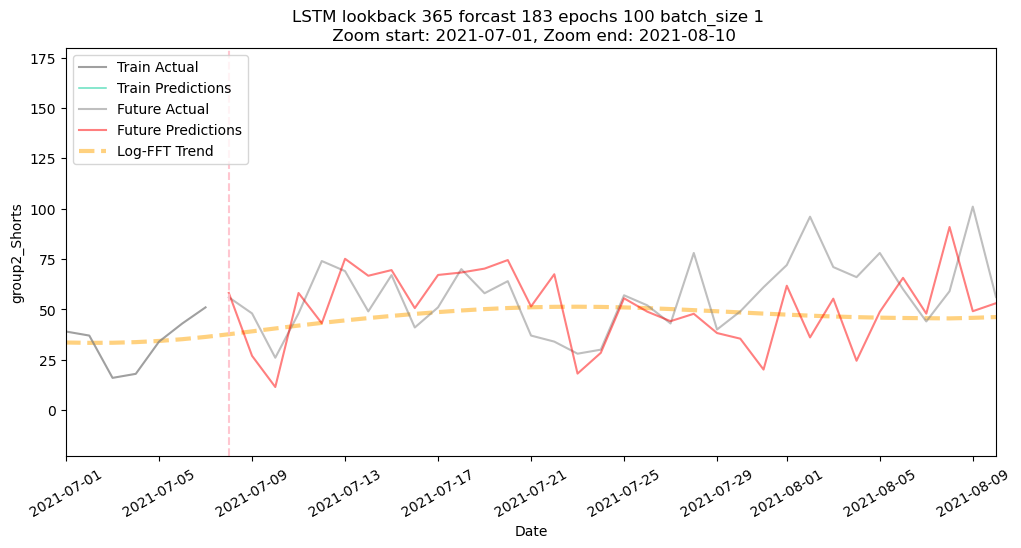

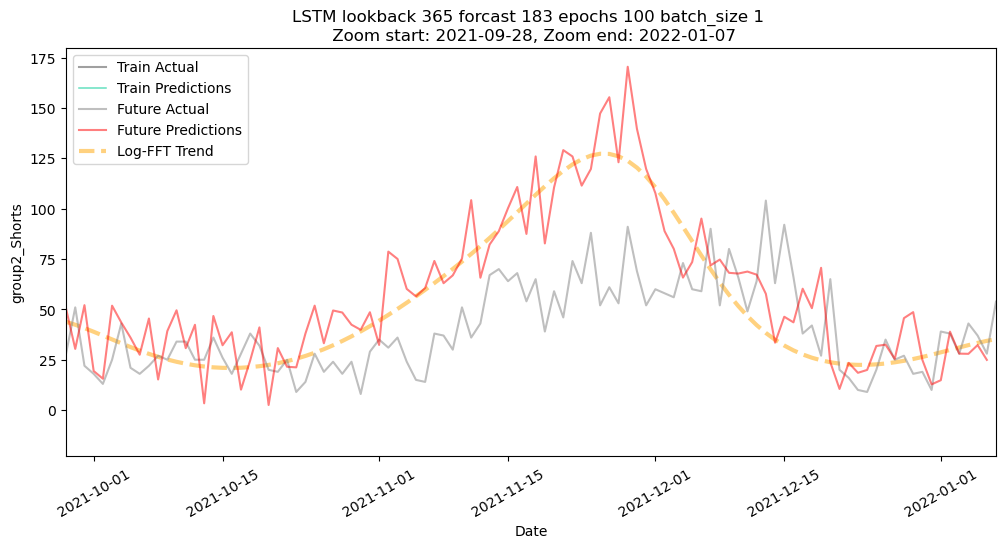

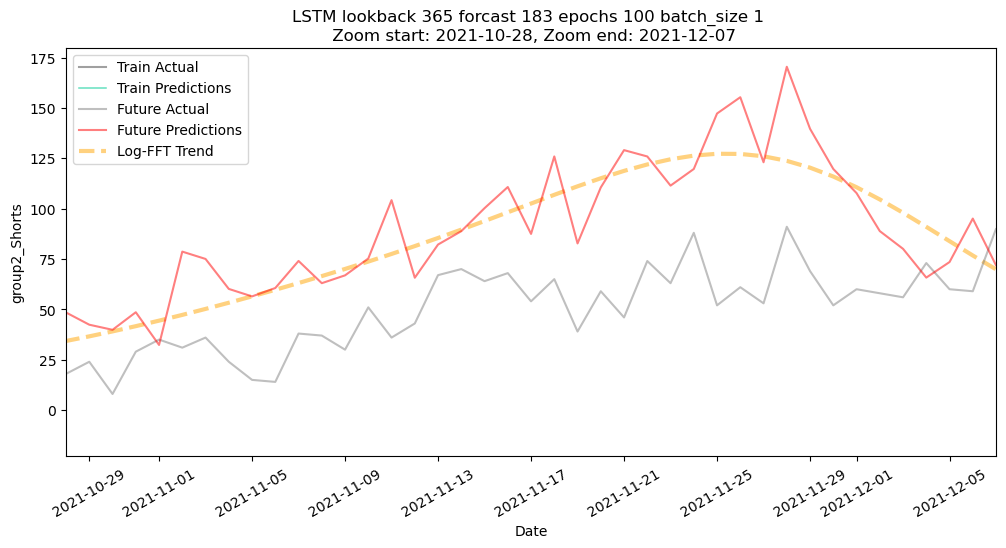

Plotting predictions for group2_With hood...


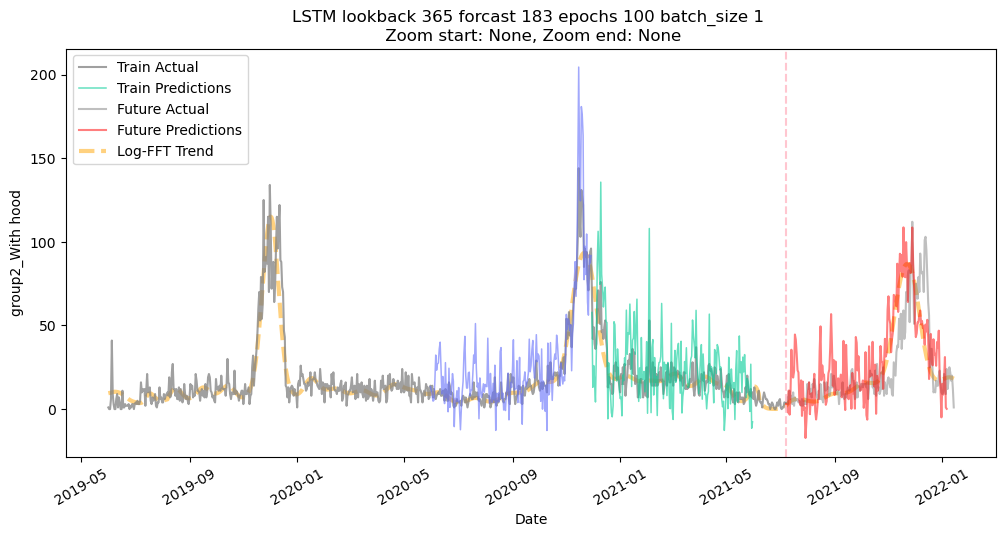

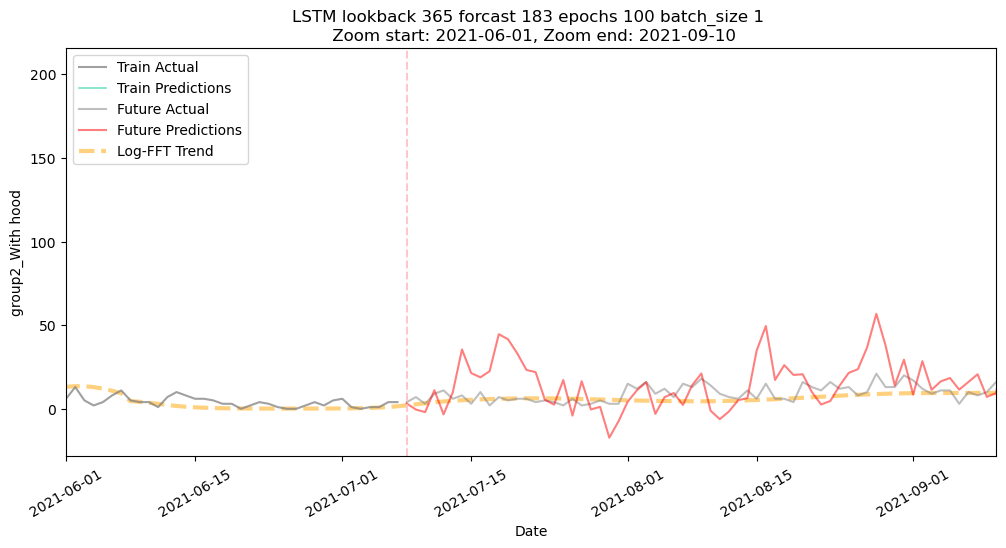

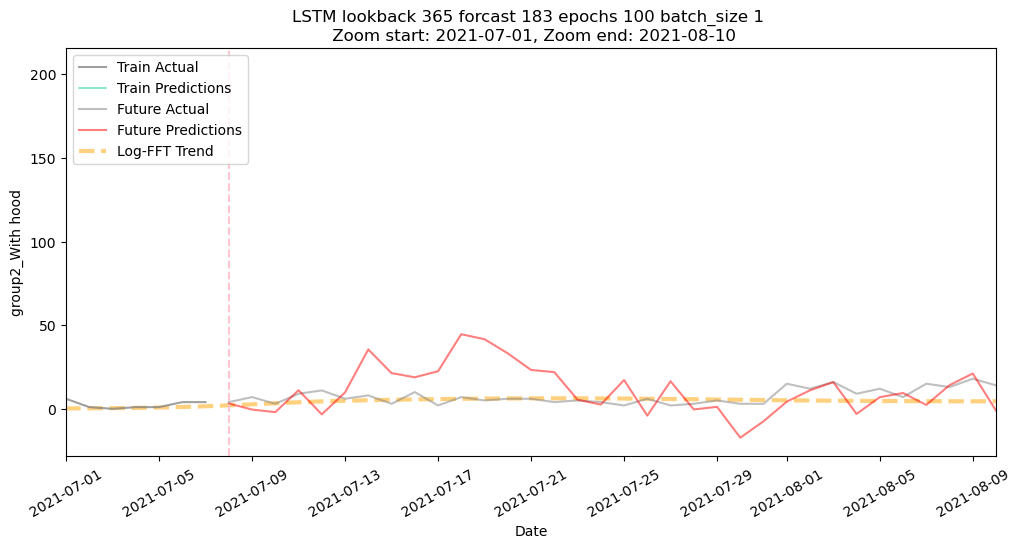

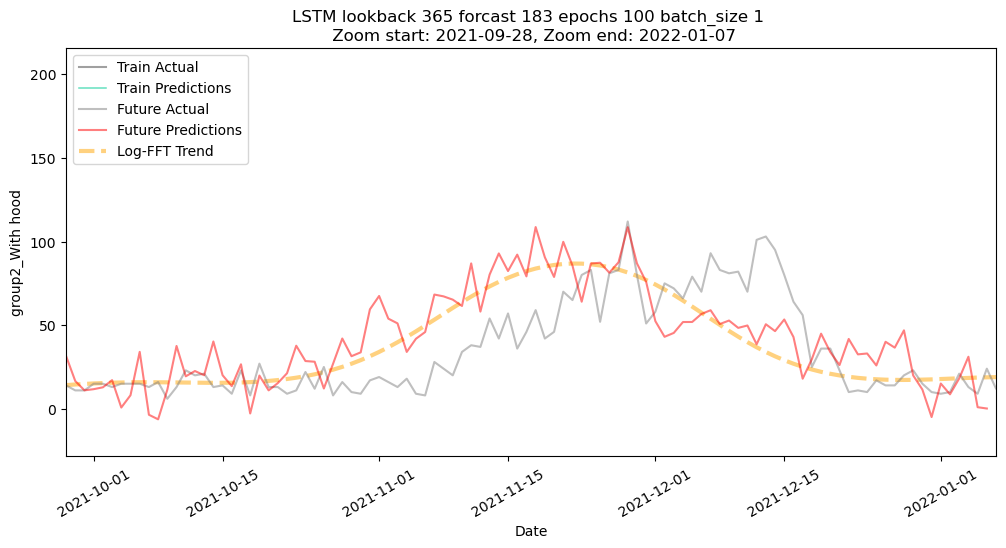

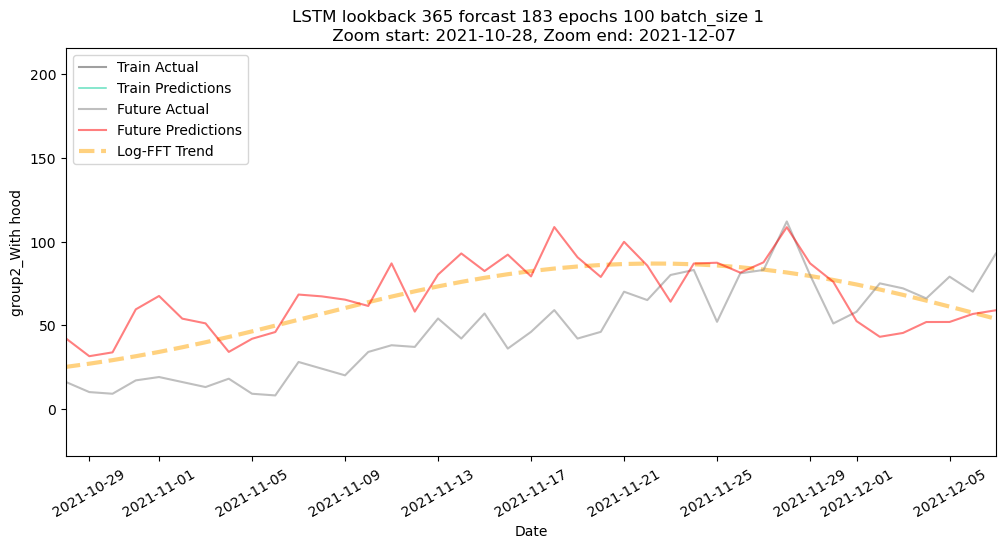

In [23]:
def plot_predictions(df_trend, train, test, train_predict, y_predict, prediction_dates, look_back, prediction_days, batch_size, zoom_start=None, zoom_end=None, plot_step=183, trend_type=3, feature_name= feature_name):
    
    trend_label_dict = {1: 'Fitted Trend', 
                    2: 'SARIMA Trend',
                    3: 'FFT Trend',
                    4: 'Log-FFT Trend'}
    # 
    # print('y_predict[0]:\n\n', y_predict[0])
    # print('y_predict.shape:\n\n', y_predict.shape)
    
    
    _column_name = feature_name

    fig, ax = plt.subplots(figsize=(12, 6))

    train_with_trend = train.iloc[:, 0] + df_trend.iloc[:, 0]
    
    trend_line,  = plt.plot(df_trend.index, df_trend, color='orange', alpha=0.5, label=trend_label_dict[trend_type], linestyle='--', linewidth=3)
    
    # Plot the actual training data
    train_actual, = plt.plot(train.index, train_with_trend[:train.shape[0]], color='grey', alpha=0.75, label='Train Actual')

    # Plot the actual test data
    test_actual = plt.plot(test.index, test, color='grey', alpha=0.5, label='Future Actual')
    
    # Initialize the train_pred variable
    train_pred = None

    # Plot the given plot_step train predictions
    for idx, i in enumerate(range(0, len(train_predict), plot_step)):
        train_pred, = plt.plot(train.index[i + look_back:i + look_back + prediction_days], (train_with_trend[i + look_back:i + look_back + prediction_days] + train_predict[i]), color=COLORS[idx % len(COLORS)], alpha=0.6, linewidth=1.1)

    # Plot the future predictions
    future_pred, = plt.plot(prediction_dates, y_predict[0], color='red', alpha=0.5, label='Future Predictions')

    # Add a vertical red dashed line on the first date of prediction_dates
    plt.axvline(x=prediction_dates[0], color='pink', alpha=0.9, linestyle='--')

    # Customize the plot
    plt.legend([train_actual, train_pred, test_actual[0], future_pred, trend_line], ['Train Actual', 'Train Predictions', 'Future Actual', 'Future Predictions', f'{trend_label_dict[trend_type]}'], loc='upper left')
    plt.xticks(rotation=30)
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel('Date')
    plt.ylabel(_column_name)

    # Apply the zoom range
    if zoom_start is not None or zoom_end is not None:
        ax.set_xlim(pd.to_datetime(zoom_start), pd.to_datetime(zoom_end))

    # Add zoom dates to the title
    zoom_start_str = zoom_start if zoom_start is not None else 'None'
    zoom_end_str = zoom_end if zoom_end is not None else 'None'
    plt.title(f'LSTM lookback {look_back} forcast {prediction_days} epochs {_epochs} batch_size {batch_size} \n Zoom start: {zoom_start_str}, Zoom end: {zoom_end_str}')

    # Save the plot as a PNG file
    file_name = os.path.join(LSTM1_OUT_PATH, f'LSTM_lookback_{look_back}_forcast_{prediction_days}_epochs_{_epochs}_batch_size_{batch_size}_step_{plot_step}_zoom_start_{zoom_start_str}_zoom_end_{zoom_end_str}_{_column_name}.png')
    plt.savefig(file_name, dpi=300)
    plt.show()


for i in range(num_dep_features):
    feature_name = df_trend.columns[i]
    print(f'Plotting predictions for {feature_name}...')
    plot_predictions(df_trend[[df_trend.columns[i]]], train[[train.columns[i]]], test[[test.columns[i]]], train_predict[:, :, i], y_predict[:, :, i], prediction_dates, look_back, prediction_days, _batch_size, plot_step=max(150, prediction_days), trend_type=trend_type, feature_name= feature_name)
    plot_predictions(df_trend[[df_trend.columns[i]]], train[[train.columns[i]]], test[[test.columns[i]]], train_predict[:, :, i], y_predict[:, :, i], prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-06-01', zoom_end='2021-09-10', plot_step=max(150,prediction_days), trend_type=trend_type, feature_name= feature_name) 
    plot_predictions(df_trend[[df_trend.columns[i]]], train[[train.columns[i]]], test[[test.columns[i]]], train_predict[:, :, i], y_predict[:, :, i], prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-07-01', zoom_end='2021-08-10', plot_step=max(150,prediction_days), trend_type=trend_type, feature_name= feature_name)
    plot_predictions(df_trend[[df_trend.columns[i]]], train[[train.columns[i]]], test[[test.columns[i]]], train_predict[:, :, i], y_predict[:, :, i], prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-09-28', zoom_end='2022-01-07', plot_step=max(150,prediction_days), trend_type=trend_type, feature_name= feature_name)
    plot_predictions(df_trend[[df_trend.columns[i]]], train[[train.columns[i]]], test[[test.columns[i]]], train_predict[:, :, i], y_predict[:, :, i], prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-10-28', zoom_end='2021-12-07', plot_step=max(150,prediction_days), trend_type=trend_type, feature_name= feature_name)

# for i in range(num_dep_features):
#     plot_predictions(df_trend, train.loc[train_dates], test, train_predict[:,:, i], y_predict[:,:, i], prediction_dates, look_back, prediction_days, _batch_size, plot_step=max(150,prediction_days), trend_type=trend_type)
    # plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-06-01', zoom_end='2021-09-10', plot_step=max(150,prediction_days), trend_type=trend_type) 
    # plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-07-01', zoom_end='2021-08-10', plot_step=max(150,prediction_days), trend_type=trend_type)
    # plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-09-28', zoom_end='2022-01-07', plot_step=max(150,prediction_days), trend_type=trend_type)
    # plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-10-28', zoom_end='2021-12-07', plot_step=max(150,prediction_days), trend_type=trend_type)


In [24]:
# i = 1 
# train_predict[:, :, i].shape
# y_predict[:, :, i].shape

In [25]:
# df_FE_diff, df_trend